## Exploratory Data Analysis

### Extract and load the dataset

In [1]:
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data function from your custom module
from data_processing import load_data 


# Define paths
zip_file_path = '../Data/raw_analyst_ratings.csv.zip'  # Path to the .zip file
extracted_folder_path = '../Data'  # Path where the files will be extracted

In [2]:
# Load the dataset to the dataframe
df = load_data(zip_file_path, 'raw_analyst_ratings.csv')

In [ ]:
# explore the the first 5 rows
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [3]:
# Check the size of the dataset
df.shape

(1407328, 5)

In [ ]:
# checking missing values
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [ ]:
# check the data types
df.dtypes

headline                  object
url                       object
publisher                 object
date         datetime64[ns, UTC]
stock                     object
dtype: object

In [4]:
# check the uniqueness of the data
# Duplicate rows
print("\nDuplicate rows:")
df[df.duplicated()].reset_index()


Duplicate rows:


,index,headline,url,publisher,date,stock
0,562357,"Top Performing Industries For July 1, 2015",https://www.benzinga.com/news/15/07/5642290/to...,Lisa Levin,2015-07-01 00:00:00+00:00,GME


In [5]:
# drop duplicated rows
df = df.drop_duplicates().reset_index()

## Descriptive Statistics

In [6]:
# import eda
import eda

# Descriptive statistics
print("Headline Length Statistics:")
print(eda.headline_length_stats(df))

Headline Length Statistics:
count    1.407327e+06
mean     7.312054e+01
std      4.073532e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


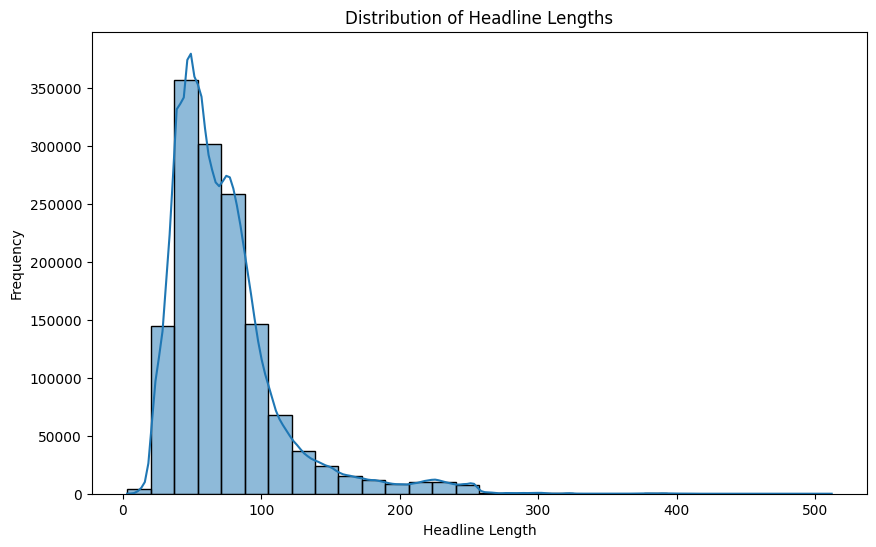

In [7]:
# Plot the distribution of headline lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

Summary of the Distribution Plot:

According to the descriptive statistics and distribution plot above, we can conclude that the distribution is heavily skewed to the right. This indicates that most headlines are relatively short, while a smaller number of headlines are significantly longer.

The peak of the distribution is around 50-70 characters, indicating that this is the most common headline length.

In summary, the distribution of headline lengths is right-skewed with a peak around 50-70 characters and a long tail extending towards longer headlines. Most headlines are relatively short, but a few are significantly longer.

### Count the most active publishers

In [8]:
print("Top Publishers:")
publisher_counts = eda.articles_per_publisher(df).reset_index(name="no_of_articles")
top_publisher = publisher_counts.head(10)
top_publisher

Top Publishers:


,publisher,no_of_articles
0,Paul Quintaro,228373
1,Lisa Levin,186978
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


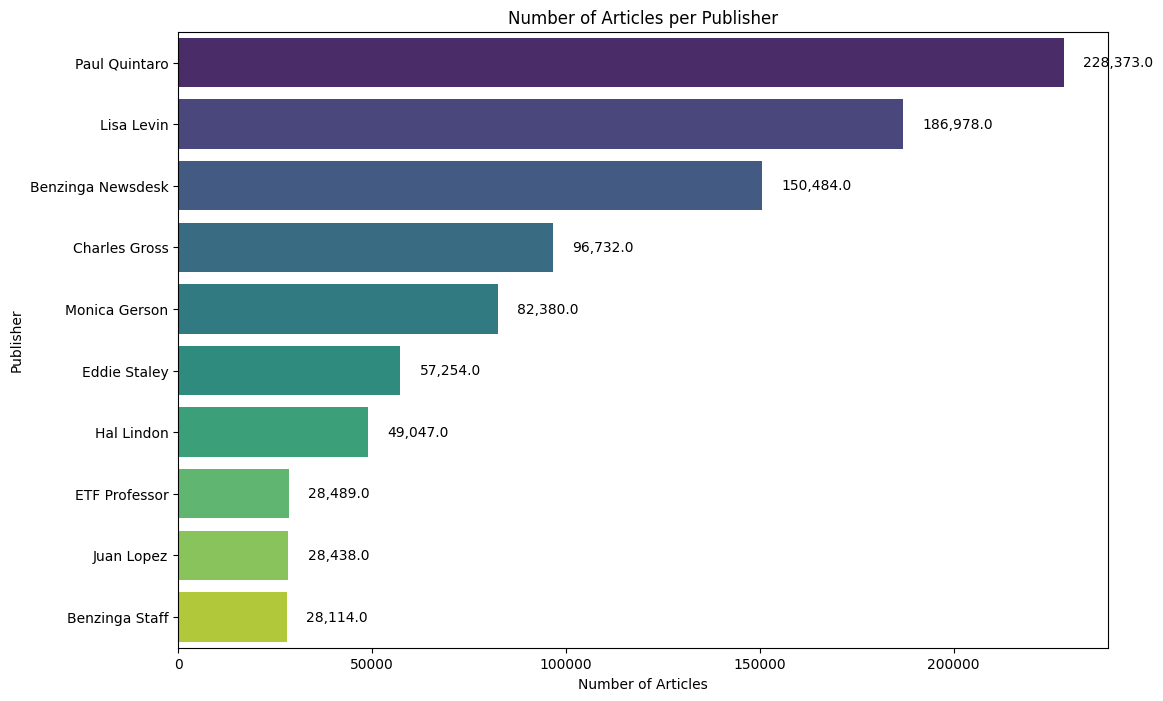

In [9]:
import matplotlib.pyplot as plt

# Plot the number of articles per publisher
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
bars = sns.barplot(x='no_of_articles', y='publisher', 
                   data=top_publisher, 
                   palette='viridis',
                   hue='publisher',
                   ax=ax)

# Add exact numbers at the end of each bar
for bar in bars.patches:
    width = bar.get_width()
    label = f'{width:,}'
    ax.text(width + 5000, bar.get_y() + bar.get_height() / 2, label,
            ha='left', va='center', color='black', fontsize=10)

plt.title('Number of Articles per Publisher')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


Summary of Most Active Publishers
- Paul Quintaro is the most active publisher with 228,373 articles.
- Lisa Levin follows with 186,978 articles.
- Benzinga Newsdesk has 150,484 articles, making it the third most active.
- Charles Gross and Monica Gerson are also highly active, with 96,732 and 82,380 articles, respectively.
- Eddie Staley, Hal Lindon, ETF Professor, Juan Lopez, and Benzinga Staff are notable contributors, each publishing between 28,114 and 57,254 articles.

### Articles by day of weeks

In [10]:
# Articles by day of weeks
articles_by_day = eda.articles_by_day_of_week(df).reset_index(name='no_of_articles')
articles_by_day

,day_of_week,no_of_articles
0,Thursday,302619
1,Wednesday,300921
2,Tuesday,296505
3,Monday,265139
4,Friday,217918
5,Sunday,16466
6,Saturday,7759


The above analysis shows that Thursday is the peak day for publishing articles with 12,688 entries, followed closely by Wednesday and Tuesday with 11,891 and 11,002 articles, respectively. Activity drops significantly on weekends, with Sunday and Saturday seeing only 436 and 267 articles, indicating a clear mid-week publishing trend.

### Analyze articles by hour of the day



In [ ]:
article_counts_by_hour = eda.articles_by_hour(df)
print(article_counts_by_hour)

## Text Analysis(Sentiment analysis & Topic Modeling)

In [ ]:
# Import the module
from sentiment_analysis import SentimentAnalyzer as sa

# Perform sentiment analysis on headline
sentiment_df = sa.analyze_sentiment(df['headline'])

# Apply sentiment categories (Positive, Neutral, Negative)
sentiment_df = sa.apply_sentiment_categories(sentiment_df)

[nltk_data] Downloading package punkt_tab to /home/noh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /home/noh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/noh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Display results
sentiment_df.head()

,headline,neg,neu,pos,compound,Sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral
2,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive


Sentiment Distribution of Headlines

Sentiment
Neutral     741194
Positive    441857
Negative    224276
Name: count, dtype: int64


/tmp/ipykernel_20245/1781788973.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_text = f'{percentages[i]:.1f}%'


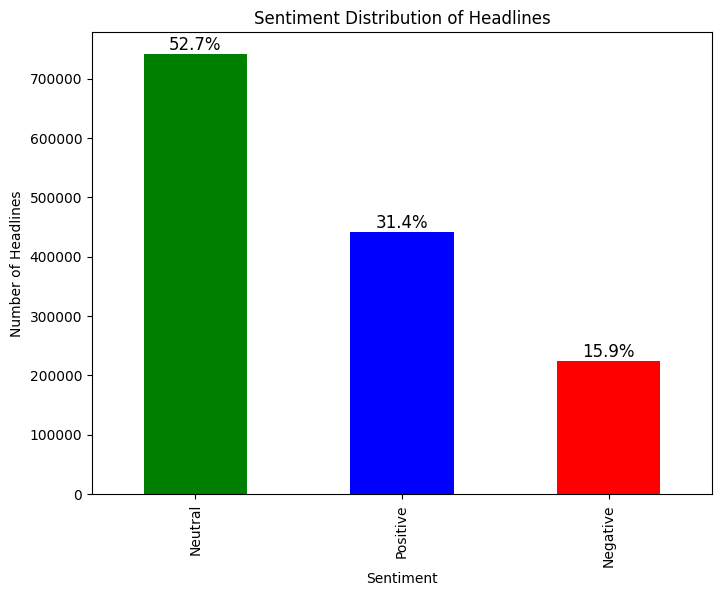

In [ ]:
# Summary of sentiment distribution
sentiment_distribution = sentiment_df['Sentiment'].value_counts()
print(sentiment_distribution)

total = sentiment_distribution.sum()  # Calculate the total number of headlines
percentages = (sentiment_distribution / total) * 100  # Calculate percentages

# Optional: Plot the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])

# Add percentage annotations on top of each bar
for i, bar in enumerate(bars.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the percentage and format it
    percentage_text = f'{percentages[i]:.1f}%'
    # Position the text at the end of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, percentage_text, 
             ha='center', va='bottom', fontsize=12)

# Set titles and labels
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')

# Display the plot
plt.show()



The majority of the headlines (52.7%) are neutral in tone, indicating that much of the financial news is factual or balanced without a strong positive or negative bias. A significant portion (31.4%) of the headlines convey a positive sentiment, suggesting that there is a relatively optimistic outlook in the news. Meanwhile, a smaller percentage (15.9%) of the headlines are negative, reflecting less frequent instances of pessimism or unfavorable news.

Overall, the sentiment distribution shows that financial news tends to be more neutral or positive, with fewer headlines expressing negativity. This could be indicative of the media's focus on positive financial developments or the general market conditions during the analyzed period.

## Identify common keywords or phrases

Here are the steps to identify common kewords or phrases

Text Preprocessing:

- Clean and prepare the text data by removing stopwords, punctuation, and other noise.

Tokenization:

- Break down the text into individual words or phrases.

Frequency Analysis:

- Calculate the frequency of each word or phrase to identify the most common ones.

Topic Modeling (Optional):

- Use algorithms like Latent Dirichlet Allocation (LDA) to identify underlying topics in the headlines.

Most common keywords:
vs: 162147
stocks: 161868
q: 157878
est: 140606
eps: 128929
shares: 114209
reports: 108707
update: 91680
market: 90880
earnings: 87185
sales: 79526
top: 78677
pt: 73054
week: 67669
announces: 66529
price: 64232
buy: 64060
downgrades: 61942
trading: 61158
benzingas: 57985


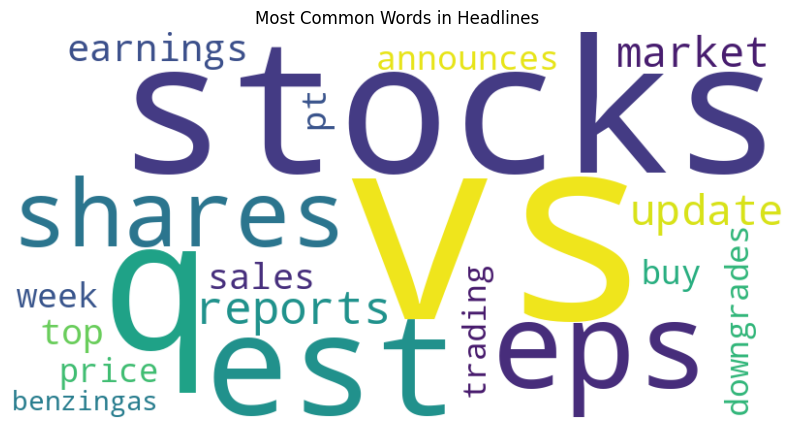

In [ ]:
# Analyze the most common keywords

sa.perform_nlp_analysis(sentiment_df['headline'])

Based on the most common keywords extracted from the headlines indicate a strong focus on stock performance, earnings reports, and market updates. Terms like "stocks," "EPS," "shares," and "earnings" are frequently mentioned, reflecting the dataset's emphasis on key financial metrics and company performance. Additionally, the prevalence of "reports," "update," and "market" highlights the importance of timely news and market conditions in financial reporting.

## Time Series Analysis

Process the data

In [ ]:
# Extract year, month, day, and hour
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour


Aggregate Data by Time

In [ ]:
# Aggregate by day to count the number of articles published each day
daily_publications = df.groupby(df['day']).size()
hourly_publications = df.groupby('hour').size()
# Optionally, aggregate by month or year
monthly_publications = df.groupby(df['month']).size()
yearly_publications = df.groupby(df['year']).size()


In [ ]:
df.head()

,index,headline,url,publisher,date,stock,year,month,day,hour
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020,6,5,14
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020,6,3,14
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020,5,26,8
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,2020,5,22,16
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,2020,5,22,15


hour
0     1351471
1          82
2          48
3          27
4          67
5          14
6          57
7          93
8        1469
9        1829
10       2476
11       5033
12       5527
13       5965
14       7669
15       5701
16       5732
17       2710
18       2075
19       1612
20       3939
21       2800
22        704
23        227
dtype: int64


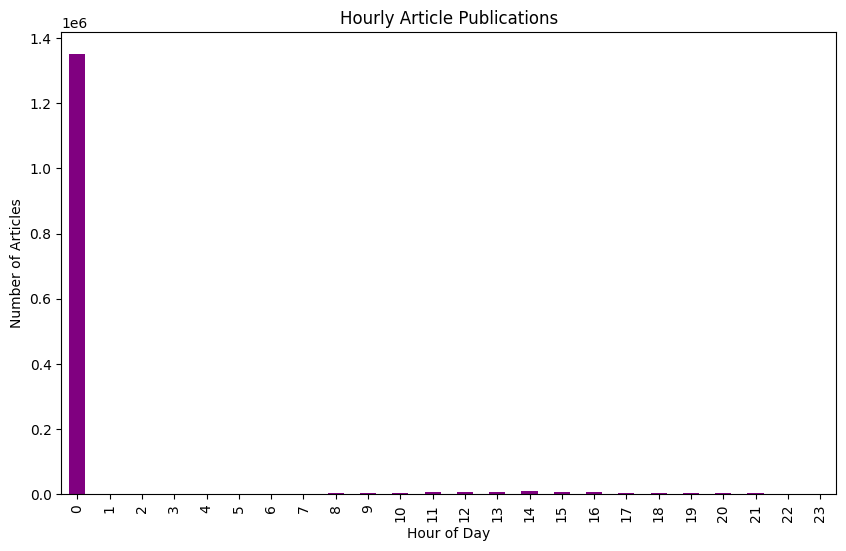

In [ ]:
hourly_publications = df.groupby('hour').size()
print(hourly_publications)

# Plotting hourly publications
plt.figure(figsize=(10, 6))
hourly_publications.plot(kind='bar', color='purple')
plt.title('Hourly Article Publications')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series to analyze trend and seasonality
decomposition = seasonal_decompose(daily_publications, model='additive', period=365)
decomposition.plot()
plt.show()


ValueError: x must have 2 complete cycles requires 730 observations. x only has 31 observation(s)